In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [1]:
with open('census.txt') as f:
    census_api_key = f.readline().split('\n')[0]

# Gathering Data
 - Using census api and brfss

## ACS Census Data

In [3]:
#required packages
# !pip install census;
# !pip install us;
import pandas as pd;
from census import Census
from us import states

In [3]:
c = Census(census_api_key)
#pull % of people in each county with insurance
varnames = {
    'NAME':'county_name',
    'B992701_001E':'total_for_insurance',
    'B992701_002E':'some_insurance',
    'B992701_003E':'no_insurance',
    'B21004_001E':'median_income',
    'C24070_011E':'has_edu_health_socservices_job',
    'C24070_001E':'total_for_job_industry'
}
variables_to_get = tuple( list( varnames.keys()))

years = [2012,2013,2014,2015,2016]
dflist = []
for yr in years:
    dflist.append(
        pd.DataFrame(
            c.acs5.get(variables_to_get, geo={'for': 'county:*', 'in': 'state:{}'.format(states.CA.fips)},year=yr)))
 
# dflist[0] = 2012 dataset
# dflist[4] = 2016 dataset
for df in dflist:
    df.rename(columns=varnames,inplace=True)
    #put into fractions
    df.loc[:,'some_insurance'] = df.loc[:,'some_insurance'] / df.loc[:,'total_for_insurance']
    df.loc[:,'no_insurance'] = df.loc[:,'no_insurance'] / df.loc[:,'total_for_insurance']
    df.loc[:,'has_edu_health_socservices_job'] = df.loc[:,'has_edu_health_socservices_job'] / df.loc[:,'total_for_job_industry']
    df.rename(columns=varnames,inplace=True)
    df.set_index('county',inplace=True)
    df.drop(columns=['state','total_for_insurance','total_for_job_industry'],inplace=True)
    
    display( df.head(3) )
    display( df.shape )

,median_income,some_insurance,no_insurance,has_edu_health_socservices_job,county_name
county,,,,,
001,34223.0,0.084999,0.915001,0.226367,"Alameda County, California"
003,27464.0,0.092732,0.907268,0.241697,"Alpine County, California"
005,25559.0,0.102707,0.897293,0.200112,"Amador County, California"


(58, 5)

,median_income,some_insurance,no_insurance,has_edu_health_socservices_job,county_name
county,,,,,
001,33894.0,0.089769,0.910231,0.227650,"Alameda County, California"
003,26357.0,0.095279,0.904721,0.175589,"Alpine County, California"
005,26176.0,0.110027,0.889973,0.194385,"Amador County, California"


(58, 5)

,median_income,some_insurance,no_insurance,has_edu_health_socservices_job,county_name
county,,,,,
001,34086.0,0.100290,0.899710,0.225663,"Alameda County, California"
003,25278.0,0.147255,0.852745,0.134653,"Alpine County, California"
005,25097.0,0.121449,0.878551,0.184728,"Amador County, California"


(58, 5)

,median_income,some_insurance,no_insurance,has_edu_health_socservices_job,county_name
county,,,,,
001,34761.0,0.111247,0.888753,0.224455,"Alameda County, California"
003,19420.0,0.142352,0.857648,0.154412,"Alpine County, California"
005,26420.0,0.128893,0.871107,0.194385,"Amador County, California"


(58, 5)

,median_income,some_insurance,no_insurance,has_edu_health_socservices_job,county_name
county,,,,,
001,36303.0,0.133606,0.866394,0.221210,"Alameda County, California"
003,22500.0,0.184966,0.815034,0.181598,"Alpine County, California"
005,27873.0,0.133436,0.866564,0.190884,"Amador County, California"


(58, 5)

# California HCP Flu Vaccination Data

In [5]:
healthcare_df = pd.read_excel('hcp-flu-vax-by-county-20162017data.xlsx')
healthcare_df.head()
healthcare_df.loc[:,['County','All Health Care Personnel (HCP) Percent Vaccinated']].set_index('County').rename(columns={'All Health Care Personnel (HCP) Percent Vaccinated':'hcp_vaccinated'});
healthcare_df.shape

(55, 14)

# BRFSS Analysis

In [1]:
import pandas as pd;
dfbrfss = pd.read_sas('LLCP2016.XPT')

In [2]:
dfbrfss = dfbrfss.loc[:,('MEDCOST',
                         'SEX',
                         '_RACE',
                         'EDUCA',
                         'INCOME2',
                         'HLTHPLN1',
                         'FLUSHOT6',
                         '_LLCPWT',
                         '_STATE')]

#only keeping Yes and No, which is around 99% of the responses
dfbrfss = dfbrfss.loc[ (dfbrfss['FLUSHOT6']<=2)]
#only keeping valid income answers 1-8
dfbrfss = dfbrfss.loc[ (dfbrfss['INCOME2']<=8)]
dfbrfss = dfbrfss.loc[ (dfbrfss['_RACE']<=8)]
dfbrfss = dfbrfss.loc[ (dfbrfss['EDUCA']<=6)]
dfbrfss = dfbrfss.loc[ (dfbrfss['SEX']<=2)]
dfbrfss = dfbrfss.loc[ (dfbrfss['MEDCOST']<=2)]
dfbrfss = dfbrfss.loc[ (dfbrfss['HLTHPLN1']<=2)]

# dfbrfss['SEX'] = dfbrfss['SEX'].astype(str)
# dfbrfss['_RACE'] = dfbrfss['_RACE'].astype(str)
# dfbrfss['HLTHPLN1'] = dfbrfss['HLTHPLN1'].astype(str)
# dfbrfss['FLUSHOT6'] = dfbrfss['FLUSHOT6'].astype(str)
# dfbrfss['MEDCOST'] = dfbrfss['MEDCOST'].astype(str)

dfbrfss['INCOME2'] = dfbrfss['INCOME2'].astype(float)
dfbrfss['EDUCA'] = dfbrfss['EDUCA'].astype(float)
dfbrfss['_LLCPWT'] = dfbrfss['_LLCPWT'].astype(float)
dfbrfss['_LLCPWT'] = dfbrfss['_LLCPWT'].div(100.)
dfbrfss['_STATE'] = dfbrfss['_STATE'].astype(float)

race_labels = {1:'WhiteNH',
               2:'BlackNH',
               3:'AmIndian_AlNative',
               4:'AsianNH',
               5:'NativeHI_PacIsl',
               6:'OtherNH',
               7:'MultiracialNH',
               8:'Hispanic'}

sex_labels = {1:'Male',2:'Female'}
medcost_labels={1:'Yes',2:'No'}
healthcare_labels={1:'Yes',2:'No'}
flushot_labels={1:'Yes',2:'No'}

dfbrfss['_RACE'].replace(race_labels, inplace=True)
dfbrfss['SEX'].replace(sex_labels, inplace=True)
dfbrfss['MEDCOST'].replace(medcost_labels, inplace=True)
dfbrfss['HLTHPLN1'].replace(healthcare_labels, inplace=True)
dfbrfss['FLUSHOT6'].replace(flushot_labels, inplace=True)

import pickle
pickle.dump( dfbrfss, open( "dfbrfss.p", "wb" ) )

In [1]:
import pickle
dfbrfss = pickle.load( open( "dfbrfss.p", "rb" ) )
dfbrfss.head()

,MEDCOST,SEX,_RACE,EDUCA,INCOME2,HLTHPLN1,FLUSHOT6,_LLCPWT,_STATE
0,No,Male,WhiteNH,4.0,5.0,Yes,Yes,7.678446,1.0
1,No,Female,WhiteNH,4.0,7.0,Yes,No,3.296599,1.0
2,No,Female,WhiteNH,5.0,7.0,Yes,Yes,2.907493,1.0
3,No,Male,WhiteNH,6.0,7.0,Yes,Yes,2.110392,1.0
7,No,Female,WhiteNH,5.0,7.0,Yes,Yes,5.221566,1.0


In [2]:
import pandas as pd
from census import Census
from us import states

with open('census.txt') as f:
    census_api_key = f.readline().split('\n')[0]
from census import Census
from us import states
c = Census(census_api_key)
# ACS Variables: https://api.census.gov/data/2016/acs/acs5/variables.html
states_list = pd.DataFrame(
    c.acs5.get(('B01003_001E','NAME'), {'for': 'state:*'}))
states_list.columns = ['pop','name','fips']
states_list = states_list.drop(states_list.index[51])
states_list['fips']=states_list['fips'].astype(float)
states_list['pop']=states_list['pop'].astype(int)
display(states_list)


,pop,name,fips
0,4841164,Alabama,1.0
1,736855,Alaska,2.0
2,6728577,Arizona,4.0
3,2968472,Arkansas,5.0
4,38654206,California,6.0
5,5359295,Colorado,8.0
6,3588570,Connecticut,9.0
7,934695,Delaware,10.0
8,659009,District of Columbia,11.0
9,19934451,Florida,12.0


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#feature_list = ['MEDCOST','SEX','_RACE','EDUCA','INCOME2','HLTHPLN1']

feature_list = ['MEDCOST','SEX','_RACE','EDUCA','INCOME2','HLTHPLN1']
print('===clearing===',flush=True)

clf_list=[]
accuracy_list=[]
X_list=[]
y_list=[]
for index, state in states_list.iterrows():
    print('===STARTING: '+state['name']+'===',flush=True)
    data = dfbrfss.loc[ dfbrfss['_STATE']== state['fips'] ] 

    print('SAMPLING pop for: '+state['name'],flush=True)
    data_sample = data.sample( int(0.1*state['pop']), weights=data['_LLCPWT'], replace=True)
    
    # Generate one-hot-encoding for categorical variables with
    # get_dummies, then split into test & train groups
    # Features
    X = pd.get_dummies(data_sample[feature_list],drop_first=True)
    X_list.append(X)

    # Labels
    y = data_sample['FLUSHOT6']
    y_list.append(y)
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test
    
    plt.figure(figsize=(12,12))
    plt.title("Feature Correlations for : "+state['name'])
    features = X
    labels = y
    
    # Compute the correlation matrix
    corr = X.corr(method='spearman')

    sns.set(font_scale=1.4)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, annot=True, square=True, cmap=cmap,mask=mask, fmt=".2f")
    plt.savefig('feature_correlation_'+state['name']+'.png',transparent=False, bbox_inches='tight')
    
    print('RANDOM FOREST: '+state['name'],flush=True)
    clf=RandomForestClassifier(n_estimators=64)
    clf.fit(X_train,y_train)
    clf_list.append(clf)
    y_pred = clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy for "+state['name']+": ", accuracy)   
    
    feature_imp = pd.Series(clf.feature_importances_,index=X.columns.tolist()).sort_values(ascending=False)
    
    plt.figure(figsize=(8,6)) 
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score for: '+state['name'])
    plt.ylabel('Features')
    plt.title("Important Features in the RandomForest for: "+state['name'])
    #plt.legend()
    plt.savefig('feature_importance_'+state['name']+'.png',transparent=False, bbox_inches='tight')
    plt.close("all")

import pickle
pickle.dump(clf_list, open("clf_list.p","wb"))
pickle.dump(accuracy_list, open("accuracy_list.p","wb"))
pickle.dump(X_list, open("X_list.p","wb"))
pickle.dump(y_list, open("y_list.p","wb"))

===clearing===
===STARTING: Alabama===
SAMPLING pop for: Alabama
RANDOM FOREST: Alabama
Accuracy for Alabama:  0.6857364763816937
===STARTING: Alaska===
SAMPLING pop for: Alaska
RANDOM FOREST: Alaska
Accuracy for Alaska:  0.7510585169905548
===STARTING: Arizona===
SAMPLING pop for: Arizona
RANDOM FOREST: Arizona
Accuracy for Arizona:  0.698391938887733
===STARTING: Arkansas===
SAMPLING pop for: Arkansas
RANDOM FOREST: Arkansas
Accuracy for Arkansas:  0.7128361989974668
===STARTING: California===
SAMPLING pop for: California
RANDOM FOREST: California
Accuracy for California:  0.6797253597280503
===STARTING: Colorado===
SAMPLING pop for: Colorado
RANDOM FOREST: Colorado
Accuracy for Colorado:  0.6386855048774844
===STARTING: Connecticut===
SAMPLING pop for: Connecticut
RANDOM FOREST: Connecticut
Accuracy for Connecticut:  0.6333611993535083
===STARTING: Delaware===
SAMPLING pop for: Delaware
RANDOM FOREST: Delaware
Accuracy for Delaware:  0.6999315302978432
===STARTING: District of Colum

In [ ]:
accuracy_list

~~~
n=100 estimators sample=full population
Accuracy for Alabama:  0.6867704065824354
Accuracy for Alaska:  0.746391202269098
Accuracy for Arizona:  0.6989354861402158
Accuracy for Arkansas:  0.7119012915729971
Accuracy for California:  0.6805807768054913
Accuracy for Colorado:  0.6395590466161916
Accuracy for Connecticut:  0.634059435002429
Accuracy for Delaware:  0.6967429718732281
Accuracy for District of Columbia:  0.6969545226931306
Accuracy for Florida:  0.6860586094159258
Accuracy for Georgia:  0.7238282709462948
Accuracy for Hawaii:  0.666837223120853
Accuracy for Idaho:  0.6995261339665134
Accuracy for Illinois:  0.6998129428407063
Accuracy for Indiana:  0.6727085287175611
Accuracy for Iowa:  0.6380275478901304
Accuracy for Kansas:  0.6677676977715621
Accuracy for Kentucky:  0.6524667251436804
Accuracy for Louisiana:  0.7338080406055532
Accuracy for Maine:  0.6401271251225008
Accuracy for Maryland:  0.6516442380776869
Accuracy for Massachusetts:  0.6523726628970115
Accuracy for Michigan:  0.6679526250639111
Accuracy for Minnesota:  0.6248580501828148
Accuracy for Mississippi:  0.7093809032091155
Accuracy for Missouri:  0.6635819650849113
Accuracy for Montana:  0.6742633982372369
Accuracy for Nebraska:  0.6414973652410264
Accuracy for Nevada:  0.7452767941842227
Accuracy for New Hampshire:  0.6556844803905075
Accuracy for New Jersey:  0.6939266898648303
Accuracy for New Mexico:  0.6825229152962303
Accuracy for New York:  0.6561900197622773
Accuracy for North Carolina:  0.6676206446879519
Accuracy for North Dakota:  0.66445399345254
Accuracy for Ohio:  0.6655082746873421
Accuracy for Oklahoma:  0.6882616582249412
Accuracy for Oregon:  0.677046006423472
Accuracy for Pennsylvania:  0.6560685065735918
Accuracy for Rhode Island:  0.6639207455081113
Accuracy for South Carolina:  0.6655660370854023
Accuracy for South Dakota:  0.6702778495836564
Accuracy for Tennessee:  0.6978186247933851
~~~

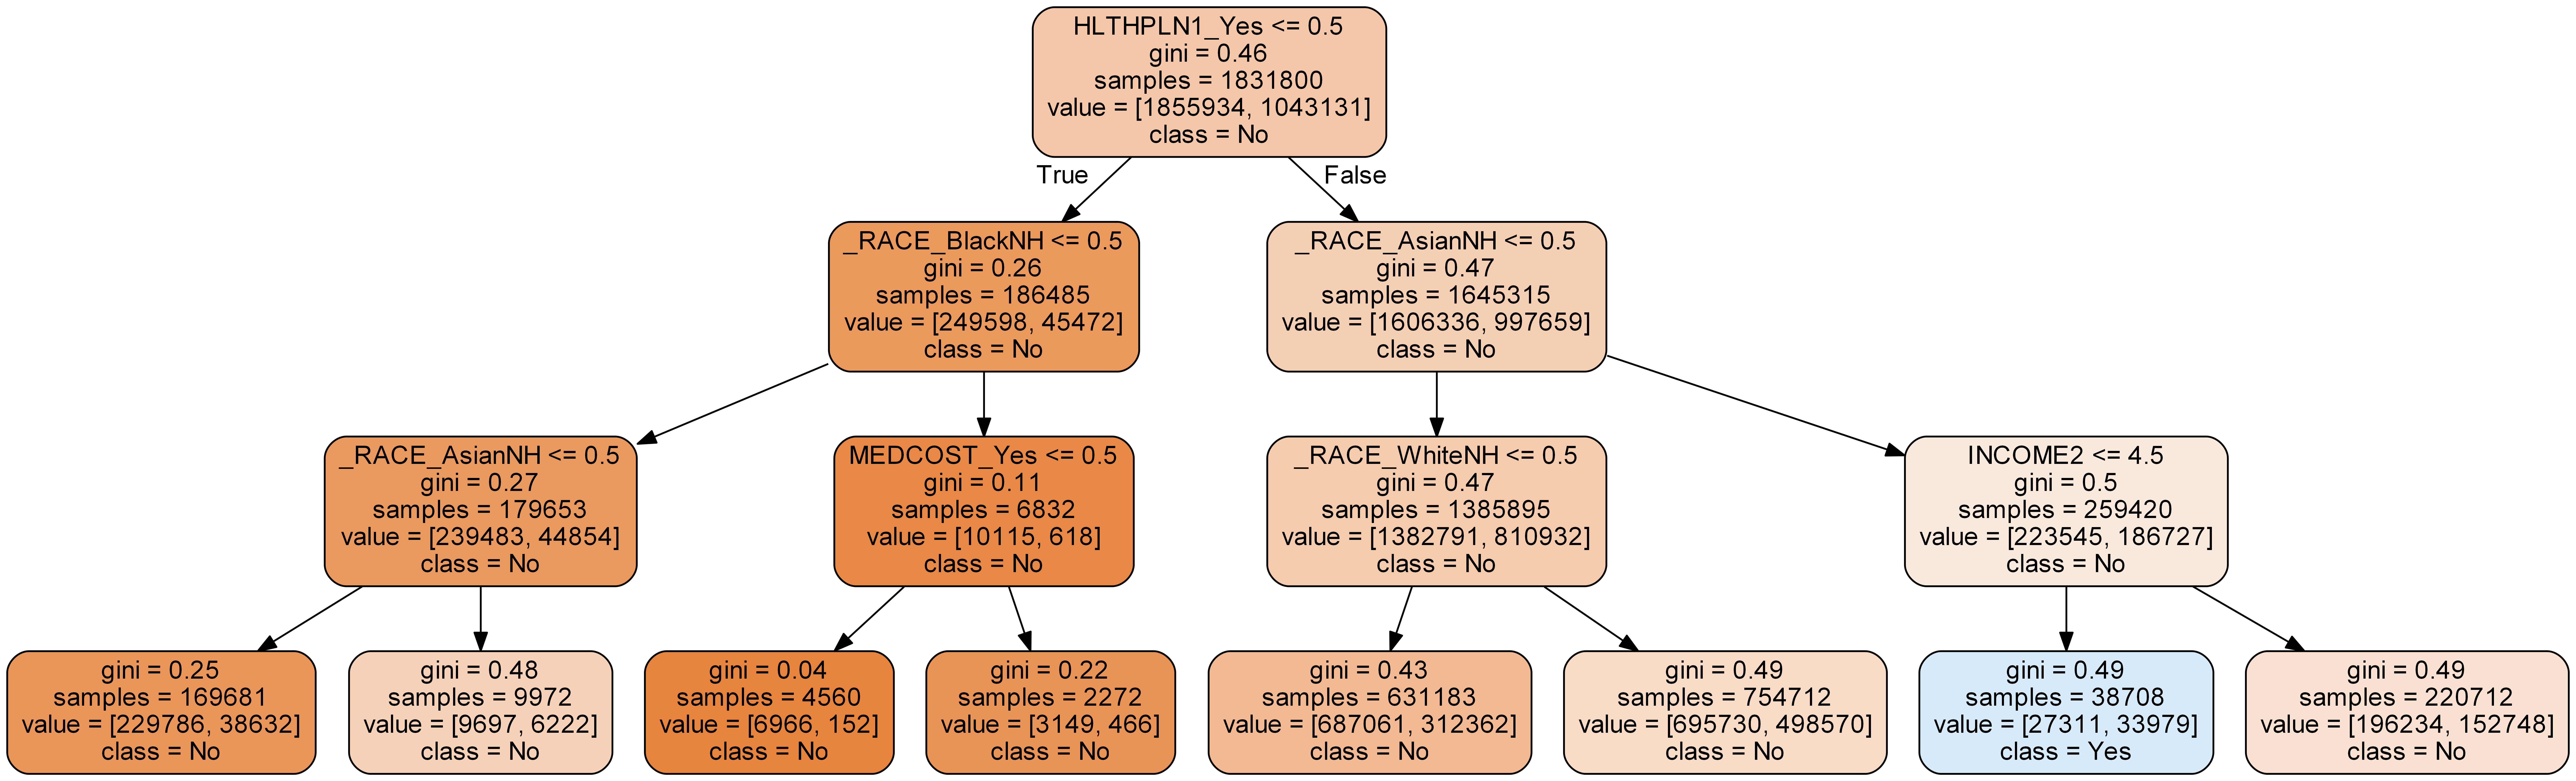

In [18]:
import pickle
clf_list = pickle.load( open("clf_list.p","rb"))
X_list = pickle.load( open("X_list.p","rb"))
y_list = pickle.load( open("y_list.p","rb"))


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


estimator = clf_list[4].estimators_[5]

# Extract the small tree

# Save the tree as a png image
# export_graphviz(estimator, out_file = 'tree.dot', feature_names = X_list[4].columns, rounded = True, precision = 1)

# # Export as dot file
export_graphviz(estimator,
                out_file='tree.dot',
                feature_names=X_list[4].columns,
                class_names=y_list[4].unique(),
                rounded = True, 
                precision = 2, 
                filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

```
_RACE
1 White only, non-Hispanic
2 Black only, non-Hispanic
3 American Indian or Alaskan Native only,Non-Hispanic
4 Asian only, non-Hispanic
5 Native Hawaiian or other Pacific Islander only,Non-Hispanic
6 Other race only, non-Hispanic
7 Multiracial, non-Hispanic
8 Hispanic


EDUCA
# 1=Never attended school or only kindergarten
2=Grades 1 through 8 (Elementary)
3=Grades 9 through 11 (Some high school)
4=Grade 12 or GED (High school graduate) 
5=College 1 year to 3 years (Some college or technical school)
6=College 4 years or more (College graduate) 
9=refused


 INCOME2
1 Less than $10,000
2 Less than $15,000 ($10,000 to less than $15,000)
3 Less than $20,000 ($15,000 to less than $20,000)
4 Less than $25,000 ($20,000 to less than $25,000)
5 Less than $35,000 ($25,000 to less than $35,000)
6 Less than $50,000 ($35,000 to less than $50,000)
7 Less than $75,000 ($50,000 to less than $75,000)
8 $75,000 or more 127,081 26.34 27.47
77 Don’t know/Not sure 35,338 7.32 8.24
99 Refused 42,177 8.74 7.85
```
